# Activity 3.1 Logistic Regression


#### Intended Learning Outcomes (ILOs):

- Demonstrate how to train and predict classification model using logistic regression.
- Demonstrate how to evaluate the performance of the logistic regression.
- Demonstrate how to visualize the performance of the logistic regression.


#### Resources:

- Jupyter Notebook
- Titanic


#### Procedure:


Import the libraries.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data using Pandas and check the content of the dataframe


In [ ]:
titanic = pd.read_csv(r'C:\Users\Inday\Desktop\Github\DATASCI\CPE 312\module 3\data\Logistic Regression\titanic.csv')

In [ ]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Check the missing data.
Use seaborn to create a simple heatmap to see where are the missing data


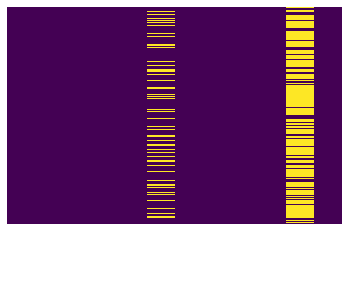

In [ ]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis');

There are 20% of Age data is missing. We need to replace the missing data with some of imputation.
The Cabin column are also missing too much of that data.


Use data visualization to analyze the data


<AxesSubplot:xlabel='Survived', ylabel='count'>

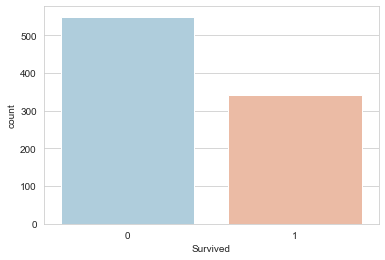

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='RdBu_r')

Interpret the result of the graph


    it seems that more people died than survived in the sinking of titanic. A little below 350 survived, while a little over 550 died


<AxesSubplot:xlabel='Survived', ylabel='count'>

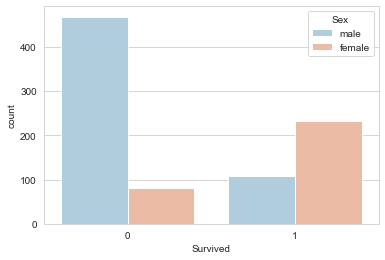

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

Interpret the result of the graph.


    Clearly we can see that significantly more men died in the titanic incident than women. The number of women that survived were about twice the amount of men.


<AxesSubplot:xlabel='Survived', ylabel='count'>

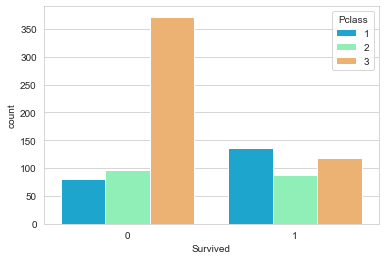

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

Interpret the result.


    Most of the ones whjo died belong in the (Pclass = 3) group, whereas the least likely to die were the people in the (Pclas = 1), tho not by much


C:\Users\Inday\Desktop\Github\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

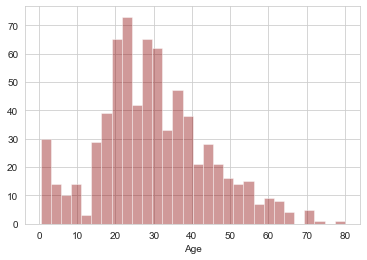

In [ ]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=30)

Interpret the result of the graph.


Type your answer here


In [ ]:
import cufflinks as cf
cf.go_offline()

In [ ]:
titanic['Fare'].iplot(kind='hist',bins=30,color='green')

Replace the missing data of the Age column. One way to do this is by filling in the mean age of all the passengers (imputation).


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

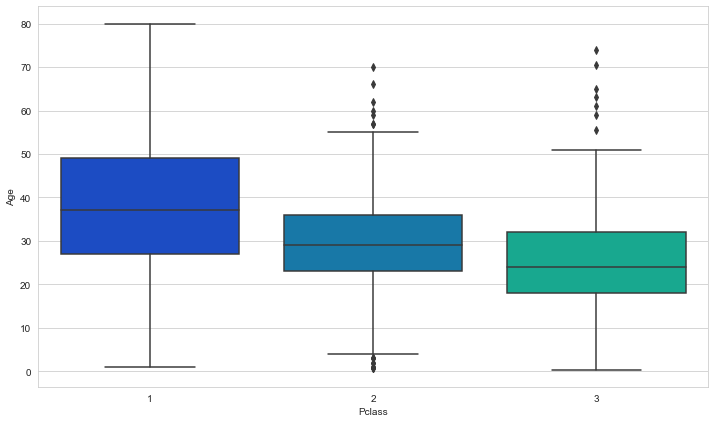

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [ ]:
#create a function to replace the missing data
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
#apply the function
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

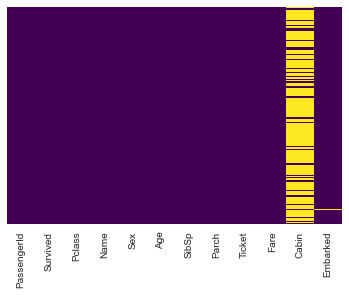

In [ ]:
#check the missing data
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop the Cabin column and the row in Embarked that is NaN.


In [ ]:

titanic.drop('Cabin',axis=1,inplace=True)

In [ ]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [ ]:
#drop NaN 
titanic.dropna(inplace=True)

Convert categorical features to dummy variables using pandas


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [ ]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
titanic = pd.concat([titanic,sex,embark],axis=1)
titanic.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

Build the Logistic Regression Model

Split the data into a training set and test set


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

Train the model


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Inday\Desktop\Github\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Predict the values for the testing data


In [ ]:
predictions = logmodel.predict(X_test)

Check precision,recall,f1-score using classification report


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



Interpret the precision, recall f1-score


- Precision is the ratio of True Positives to the sum amount of True Positives and False Positives. The precision for the target values 0 and 1 is close in value.
- The recall value describes the ability of the classifier to find all of the positives. Its formula is (True Positives / True Positives + False Negatives). The target variable "1" has the higher recall value compared to the variable "0". For class 1, it seems that the model predicted a lot of False Negatives or predicted a lot of people who died even the though they were alive.
- The F1-score is a harmonic mean of precision and recall. It is a measure of how well the classifier is able to predict each class. Here it seems that the model is able to predict the class, "0", than "1".


Evaluate the accuracy and confusion matrix of the model


- The accuracy of 0.79775 is a percentage value that is described as the ratio of correct predictions to the toal predictions.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
print(accuracy_score(y_test, predictions))

0.797752808988764


In [ ]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 39,  65]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

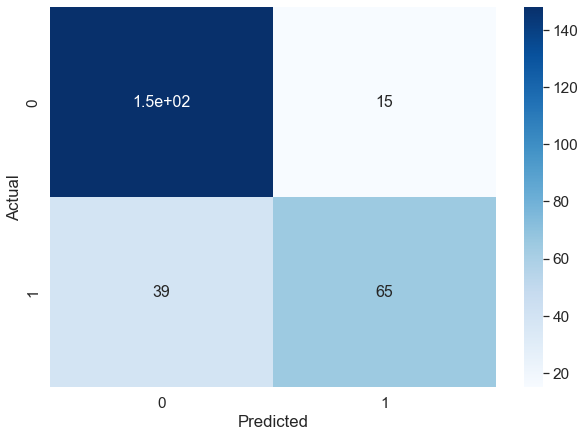

In [ ]:
data = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(predictions))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

- The confusion matrix shows a matrix with the predicted classes in the x-axis and in the actual classes in the y-axis. The diagonal matrix represents the number of correct predictions for each class. One can see that clearly the model is able to predict the 0 class better than it can predict the 1 class.


# Supplementary Activity:

- Choose your own dataset
- Import the dataset
- Determine the number of datapoints, columns and data types
- Remove unneccesary columns
- Do data cleaning such as removing empty values(NaN), replacing missing data .
- Perform descriptive statistics such as mean, median and mode
- Perform data visualization
- Solve classification problem using Logistic Regression
- Evaluate the model using classification report, accuracy and confusion matrix


In [57]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
from google.colab import drive

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df = pd.read_csv("/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 1st sem)/Predictive Analytics w  Machine Learning/CPE 312 - Machine Learning/data/logistic regression/weatherAUS.csv")

In [61]:
df.head()

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]

#### Objective(s):

This activity aims to solve classification problem using logistic regression


In [62]:
print(df.shape)

(145460, 23)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

- Remove null values for RainToday and RainTomorrow since the latter is needed for training and testing and the former feels like a good predictor.


In [64]:
df.dropna(subset = ['RainToday','RainTomorrow'], inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [66]:
px.histogram(df, x = 'Location', title='Location vs. Rainy Days', color ="RainToday")

    Data seems to be evely distributed. Cities generally get more rains than no. Additionally and generally, most cities experience 20% of the time with rain for the last 10 years.


In [67]:
px.histogram(df, x = 'RainTomorrow', title='RainTomorrow vs. Rainy Days', color ="RainToday")

More instances of <b>not raining today and not raining tomorrow</b> than other cases.

    So we can observes that AUS predictor for tomorrow not raining is if it did not rain yesterday. There seems to be no correlation to raining today and then raining tomorrow VS NOT raining today and then raining tomorrow. So this means using the RainToday predictor to whether it WILL rain tomorrow would be bad since there is no clear distinction that RainToday values reveals a tendency for it to rain tomorrow.

    TLDR: Predictor column 'RainToday' is better at predicting "No" for 'RainTomorrow' than predicting "Yes".


In [68]:
px.histogram(df, x = 'Temp3pm', title='Temp at 3pm vs. Rainy Days', color ="RainToday")

    We can see that usually there are more instances of "No" for "RainTomorrow" than "Yes" for any given temperature at 3PM. Most of the days experience an average temperature of 15-25 degreees celcius. It is also around these temperatures do we see the most amount of rainy days, even tho it is around these temps that we also see the most amount of non-rainy days. Higher temperatures of 35-45+ almost guarantee no rain.


In [69]:
px.scatter(df.sample(5000), x = 'MinTemp', y = 'MaxTemp', title="Minimum Temperature vs Maximum Temperature as predictor for tomorrow's rain", color ="RainToday", opacity=0.5)

    Generally, for the days with similar minimum temperatures, a higher maximum temperature seems to indicate that it will not rain on that day. The vertical shift of the otherwise similarly positioned scatter plot of the two predictor columns (with RainToday as indicated) is due to the fact that the higher maximum temperature is, the more likely to not rain on that day.


## Training, Validation, and Test sets

- training 60%
- validation 20%
- test 20%


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
train_val_df , test_df = train_test_split(df, test_size=0.2, random_state=101)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=101)

Conclusion:


In [72]:
print("shape of train_df is {}".format(train_df.shape))
print("shape of validity_df is {}".format(val_df.shape))
print("shape of test_df is {}".format(test_df.shape))

shape of train_df is (84471, 23)
shape of validity_df is (28158, 23)
shape of test_df is (28158, 23)


Since we are working with data that involves time it is best that we don't train our model with dates that would appear in our validation and test dataset. Meaning one should not train models based on data that is in the future or will be included in the test/validation dataset.


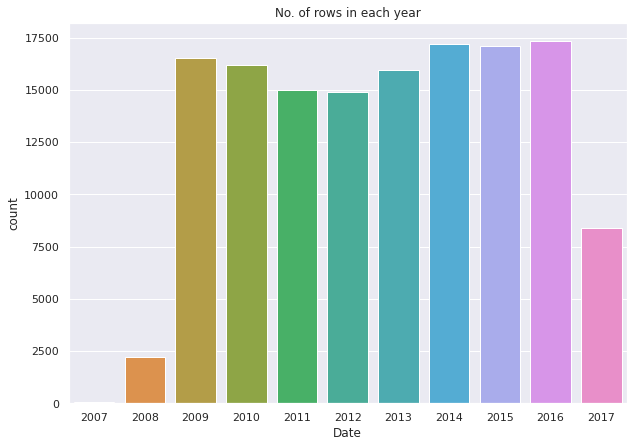

In [73]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,7))
sns.set_theme(style="darkgrid")
ax = sns.countplot(data = df,x= pd.to_datetime(df["Date"]).dt.year)
ax.set_title("No. of rows in each year");

So the data for the test/training/validation will be broken down like this:

1. train_df will contain data points with years below 2015
2. val_df will contain data points with years equal to 2015
3. test_df will contain data points with years greater than 2015


In [74]:
year = pd.to_datetime(df["Date"]).dt.year
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [75]:
print("shape of train_df is {}".format(train_df.shape))
print("shape of validity_df is {}".format(val_df.shape))
print("shape of test_df is {}".format(test_df.shape))

shape of train_df is (97988, 23)
shape of validity_df is (17089, 23)
shape of test_df is (25710, 23)


In [76]:
train_inputs = train_df.drop(['Date', 'RainTomorrow'], axis =1)
train_target = train_df["RainTomorrow"]

In [77]:
val_inputs = val_df.drop(['Date', 'RainTomorrow'], axis =1)
val_target = val_df["RainTomorrow"]
test_inputs = test_df.drop(['Date', 'RainTomorrow'], axis =1)
test_target = test_df["RainTomorrow"]

    collect all the columns that are numerical and categorical and put them into a list


In [78]:
num_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
cat_cols = train_inputs.select_dtypes(include=["object"]).columns.tolist()

In [79]:
train_inputs[num_cols].describe()

MinTemp       MaxTemp  ...       Temp9am       Temp3pm
count  97674.000000  97801.000000  ...  97414.000000  97392.000000
mean      12.007831     23.022202  ...     16.835126     21.540138
std        6.347175      6.984397  ...      6.404586      6.831612
min       -8.500000     -4.100000  ...     -5.900000     -5.100000
25%        7.500000     17.900000  ...     12.200000     16.600000
50%       11.800000     22.400000  ...     16.600000     20.900000
75%       16.600000     27.900000  ...     21.400000     26.200000
max       33.900000     48.100000  ...     40.200000     46.100000

[8 rows x 16 columns]

In [80]:
train_inputs[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing missing data


In [81]:
from sklearn.impute import SimpleImputer

#create an imputer object
imputer = SimpleImputer(strategy="mean")

In [82]:
# check the columns that have nan values and how many
train_inputs[num_cols].isnull().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [83]:
# fit the imputer model to fill each column with missing values the mean value for that column
imputer.fit(train_inputs[num_cols])

SimpleImputer()

In [84]:
# the object imputer now contains an atribute called .statistics_ which contains the mean value for each column. We can access this:
list(imputer.statistics_)

[12.0078311526097,
 23.0222022269711,
 2.37293546148508,
 5.289991404057933,
 7.609003831417626,
 40.21587318999561,
 14.09226270156723,
 18.76460755888938,
 68.62874473879673,
 51.46954744404988,
 1017.5137337413925,
 1015.132351891241,
 4.302952380952381,
 4.410676822773779,
 16.835126367873205,
 21.54013779365862]

In [85]:
# we need to inject these values in the predictor variable for all our datasets.

train_inputs[num_cols] = imputer.fit_transform(train_inputs[num_cols])
val_inputs[num_cols] = imputer.fit_transform(val_inputs[num_cols])
test_inputs[num_cols] = imputer.fit_transform(test_inputs[num_cols])

## Normalizing our Numerical columns


In [86]:
from sklearn.preprocessing import MinMaxScaler

#create an object for MinMaxScaler
scaler = MinMaxScaler()

#scaler.transform({data fram with num cols}) will result in the scaling of the values from (0,1)

train_inputs[num_cols] = scaler.fit_transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.fit_transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.fit_transform(test_inputs[num_cols])

In [87]:
# verify that the scaling worked (val_inputs is used to see the max and min but train_inputs and test_inputs both have a max of 1 and min of 0)
val_inputs[num_cols].describe().loc[["min","max"]]

MinTemp  MaxTemp  Rainfall  ...  Cloud3pm  Temp9am  Temp3pm
min      0.0      0.0       0.0  ...       0.0      0.0      0.0
max      1.0      1.0       1.0  ...       1.0      1.0      1.0

[2 rows x 16 columns]

## Encoding Categorical Data


In [88]:
# check all of our categorical columns
train_inputs[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [89]:
train_inputs[cat_cols].isnull().sum()

Location          0
WindGustDir    6868
WindDir9am     7019
WindDir3pm     1952
RainToday         0
dtype: int64

In [90]:
from sklearn.preprocessing import OneHotEncoder

In [91]:
# encoder object
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

### Try to impute missing categorical values using logistic regression


In [92]:
# Seperate the test, train, and val data into two dataframes: one w/ missing data and one w/o.

### Try to impute missing categorical values by inputting "Unknown"


In [93]:
test_inputs.fillna("Unknown", inplace = True)
train_inputs.fillna("Unknown", inplace = True)
val_inputs.fillna("Unknown", inplace = True)

In [94]:
#check to see if imputation works (val_df2 is shown here but test_df2 and train_df2 also are modified)
train_inputs

Location   MinTemp   MaxTemp  ...   Temp9am   Temp3pm  RainToday
0        Albury  0.516509  0.517241  ...  0.494577  0.525391         No
1        Albury  0.375000  0.559387  ...  0.501085  0.574219         No
2        Albury  0.504717  0.570881  ...  0.583514  0.552734         No
3        Albury  0.417453  0.614943  ...  0.520607  0.617188         No
4        Albury  0.613208  0.697318  ...  0.514100  0.679688         No
...         ...       ...       ...  ...       ...       ...        ...
144548    Uluru  0.599057  0.714559  ...  0.642082  0.720703         No
144549    Uluru  0.556604  0.783525  ...  0.754881  0.779297         No
144550    Uluru  0.608491  0.802682  ...  0.772234  0.796875         No
144551    Uluru  0.674528  0.816092  ...  0.774403  0.826172         No
144552    Uluru  0.731132  0.837165  ...  0.780911  0.830078         No

[97988 rows x 21 columns]

In [95]:
# We must first fit our encoder object with our dataframe so it can recognize the categorical columns
encoder.fit(train_inputs[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [96]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [97]:
# generate columns names to label our new one-hot encoded columns
encoded_cols = list(encoder.get_feature_names(cat_cols))

print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [98]:
# Now that we have generated the one-hot encoded columns, we shall append them to our train, validation, and test datasets
train_inputs[encoded_cols] = encoder.fit_transform(train_df[cat_cols])
test_inputs[encoded_cols] = encoder.fit_transform(test_df[cat_cols])
val_inputs[encoded_cols] = encoder.fit_transform(val_df[cat_cols])

In [99]:
# Delete redundant columns such as the categori columns such as the ones we used the one-encoded on
train_inputs.drop(cat_cols, axis = 1, inplace = True)
test_inputs.drop(cat_cols, axis = 1, inplace = True)
val_inputs.drop(cat_cols, axis = 1, inplace = True)

In [100]:
#same outputs for the train and validation datasets.
test_inputs.columns.tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',

In [101]:
print("train_inputs shape is {}".format(train_inputs.shape))
print("train_target shape is {}".format(train_target.shape))
print("val_inputs shape is {}".format(val_inputs.shape))
print("val_target shape is {}".format(val_target.shape))
print("test_inputs shape is {}".format(test_inputs.shape))
print("test_target shape is {}".format(test_target.shape))

train_inputs shape is (97988, 118)
train_target shape is (97988,)
val_inputs shape is (17089, 118)
val_target shape is (17089,)
test_inputs shape is (25710, 118)
test_target shape is (25710,)


## Train the training set using Logistic Regression


In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
model = LogisticRegression(solver='liblinear')

In [104]:
model.fit(train_inputs, train_target)

LogisticRegression(solver='liblinear')

In [105]:
weight_df = pd.DataFrame(
    {"feature": train_inputs.columns.tolist(),
    "weight": model.coef_.tolist()[0]}
)
weight_df

feature    weight
0           MinTemp  0.894303
1           MaxTemp -2.854273
2          Rainfall  3.162893
3       Evaporation  0.640867
4          Sunshine -1.649886
..              ...       ...
113    WindDir3pm_W -0.043347
114  WindDir3pm_WNW -0.285430
115  WindDir3pm_WSW  0.068019
116    RainToday_No -1.559546
117   RainToday_Yes -1.060584

[118 rows x 2 columns]

In [106]:
import plotly.graph_objects as go

neg_weights = weight_df[weight_df["weight"] < 0].sort_values("weight", ascending = False)
pos_weights = weight_df[weight_df["weight"] > 0].sort_values("weight", ascending = False)

fig = go.Figure()
fig.add_trace(go.Bar(x=neg_weights.feature, y=neg_weights.weight,
                marker_color='crimson',
                name='negative weights'))
fig.add_trace(go.Bar(x=pos_weights.feature, y=pos_weights.weight,
                marker_color='lightslategrey',
                name='positive weights'
                ))
#fig.update_xaxes(visible = False)
fig.update_xaxes(nticks = 100)
fig.update_yaxes(nticks=20, ticks = "outside")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue"
)
fig.show()

'''
press on the legends to see/remove the negative and positive weights. Negative Weights is turned off currently. press the negative weights legend to show the negative weights
'''

'\npress on the legends to see/remove the negative and positive weights. Negative Weights is turned off currently. press the negative weights legend to show the negative weights\n'

    generally the higher the coefficient the more the feature is able to accurately predict the target variable. A high negative coefficient value means that the relationship is inverse, but strong.


## Making Predictions on the validation set


In [107]:
val_predictions = model.predict(val_inputs)
val_predictions.tolist()

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',

In [108]:
# check the accuracy of the train_target and train_predictions
from sklearn.metrics import accuracy_score
print("accuracy is: {}".format(accuracy_score(val_target, val_predictions)))

accuracy is: 0.8516004447305284


In [109]:
# check the prediction probabilities for the observations
val_proba = model.predict_proba(val_inputs)
print(model.classes_)
print(val_proba)

['No' 'Yes']
[[0.98930488 0.01069512]
 [0.96371828 0.03628172]
 [0.94248961 0.05751039]
 ...
 [0.97879253 0.02120747]
 [0.9711122  0.0288878 ]
 [0.94725931 0.05274069]]


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_target, val_predictions, normalize = 'true')

array([[0.96661979, 0.03338021],
       [0.58272778, 0.41727222]])

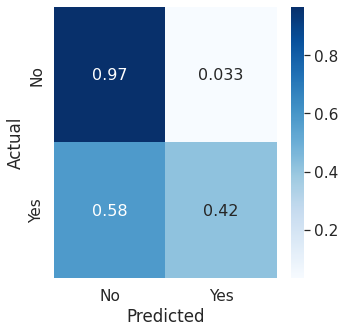

In [111]:
data = confusion_matrix(val_target, val_predictions, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(val_predictions), index = np.unique(val_target))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

    as one can see the confusion matrix reveals that the model is better at predicting whether it will not rain tomorrow than it can predict whether it will rain tomorrow.


In [112]:
from sklearn.metrics import classification_report
print(classification_report(val_target, val_predictions))

              precision    recall  f1-score   support

          No       0.86      0.97      0.91     13511
         Yes       0.77      0.42      0.54      3578

    accuracy                           0.85     17089
   macro avg       0.82      0.69      0.73     17089
weighted avg       0.84      0.85      0.83     17089



### first attempt at optimizing model by changing the hyperparameters of the logistic regression model


In [122]:
param_grid = [
    {'penalty':['l1', 'l2','elasticnet','none'],
     'solver':['liblinear','newton-cg','lbfgs','sag','saga'],
     'max_iter': [100,1000,1500,2000]
    }
]

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
logmodel = LogisticRegression()

In [125]:
clf = GridSearchCV(logmodel, param_grid, cv=2, verbose=True, n_jobs=-1)

In [126]:
best_clf = clf.fit(train_inputs, train_target)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


72 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [133]:
best_clf.best_params_

{'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [138]:
print("previous accuracy is: {}".format(accuracy_score(val_target, val_predictions)))
logmodel_optimized = LogisticRegression(max_iter = 100,penalty='l1', solver='saga').fit(train_inputs, train_target)

previous accuracy is: 0.8516004447305284


In [139]:
val_predictions_optimized = logmodel_optimized.predict(val_inputs)
print("new accuracy is: {}".format(accuracy_score(val_target, val_predictions_optimized)))

new accuracy is: 0.85171747908011


In [140]:
print("difference in accruacy scores are: {}".format(accuracy_score(val_target, val_predictions_optimized) - accuracy_score(val_target, val_predictions)))

difference in accruacy scores are: 0.00011703434958154624


The logistical regression model was optimized by changing the hyperparameters. However, after several fits using the hyperparameter combinations of param_grid, the accuracy score did not change that much. There is an improvement of 0.00011703434958154624.

Now we wil check the confusion matrix

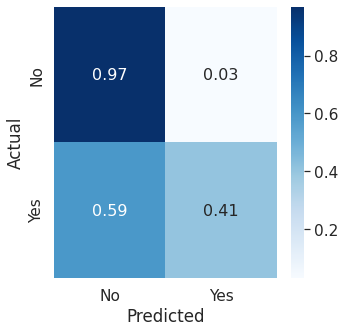

In [141]:
data = confusion_matrix(val_target, val_predictions_optimized, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(val_predictions_optimized), index = np.unique(val_target))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

looks like the model's ability to predict certainty of actually raining decreased. 

## Evaluate the FINAL model (using test dataset) using classification report, accuracy and confusion matrix


In [142]:
test_predictions = logmodel_optimized.predict(test_inputs)

In [143]:
print(classification_report(test_target,test_predictions))

              precision    recall  f1-score   support

          No       0.85      0.96      0.90     19885
         Yes       0.77      0.43      0.55      5825

    accuracy                           0.84     25710
   macro avg       0.81      0.70      0.73     25710
weighted avg       0.83      0.84      0.82     25710



In [144]:
print(accuracy_score(test_target, test_predictions))

0.841267989109296


In [150]:
print(confusion_matrix(test_target, test_predictions, normalize = 'true'))

[[0.96208197 0.03791803]
 [0.5711588  0.4288412 ]]


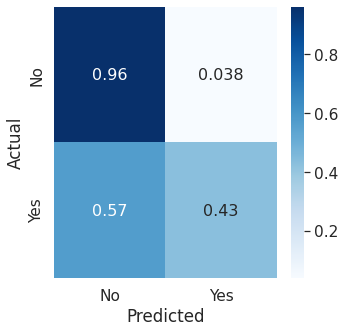

In [151]:
data = confusion_matrix(test_target, test_predictions, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(test_predictions), index = np.unique(test_target))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

# type your conclusion here


In conclusion the resulting accuracy score, confusion matrix, and classification report are undesribale in my opninion. I have initially tried to optimize the model by increasing the combinations of the hyperparameters; however, the processing of determingin which combination was the best took so much time. When the process was not done until 3 hours, I repeated the entire process again using lesser parameters. I went from 4800 fits to 160 fits using GridSearchCV.

According to the confusion matrix, the model is better at predicting No rain than it is at predicting that it would rain. In fact, if the model were used in weather forcasts and it outputs a value of "Yes", people are slightly likely to see it not rain as opposed to not raining. People should be more confident that it would not rain if the model tells them it would not rain.

My understanding of logistic regression for machine learning has greatly improved upon completing this exercise.